In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

#### Loading the Dataset.

###### Train dataset

In [2]:
DF=pd.read_csv("temperature.csv")

In [3]:
DF.head()

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,1.0,30-06-2013,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,...,0.0,0.0,0.0,37.6046,126.991,212.3350,2.7850,5992.895996,29.1,21.2
1,2.0,30-06-2013,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,...,0.0,0.0,0.0,37.6046,127.032,44.7624,0.5141,5869.312500,30.5,22.5
2,3.0,30-06-2013,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,...,0.0,0.0,0.0,37.5776,127.058,33.3068,0.2661,5863.555664,31.1,23.9
3,4.0,30-06-2013,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,...,0.0,0.0,0.0,37.6450,127.022,45.7160,2.5348,5856.964844,31.7,24.3
4,5.0,30-06-2013,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,...,0.0,0.0,0.0,37.5507,127.135,35.0380,0.5055,5859.552246,31.2,22.5


In [4]:
DF.shape

(7752, 25)

#### Lets check for null values

In [5]:
DF.isnull().sum()

station              2
Date                 2
Present_Tmax        70
Present_Tmin        70
LDAPS_RHmin         75
LDAPS_RHmax         75
LDAPS_Tmax_lapse    75
LDAPS_Tmin_lapse    75
LDAPS_WS            75
LDAPS_LH            75
LDAPS_CC1           75
LDAPS_CC2           75
LDAPS_CC3           75
LDAPS_CC4           75
LDAPS_PPT1          75
LDAPS_PPT2          75
LDAPS_PPT3          75
LDAPS_PPT4          75
lat                  0
lon                  0
DEM                  0
Slope                0
Solar radiation      0
Next_Tmax           27
Next_Tmin           27
dtype: int64

Lot of null values in the columns.

#### Checking for blank spaces, random characters in each column

In [6]:
search =[" ","?","-"," ?"," -","? ","- "," ? "," - ","NA","N/A"," NA"," N/A"]
for c in DF:
    for s in search:
        print(f"{s} in {c} = ",end= " ")
        print((DF[c] == s).sum())

  in station =  0
? in station =  0
- in station =  0
 ? in station =  0
 - in station =  0
?  in station =  0
-  in station =  0
 ?  in station =  0
 -  in station =  0
NA in station =  0
N/A in station =  0
 NA in station =  0
 N/A in station =  0
  in Date =  0
? in Date =  0
- in Date =  0
 ? in Date =  0
 - in Date =  0
?  in Date =  0
-  in Date =  0
 ?  in Date =  0
 -  in Date =  0
NA in Date =  0
N/A in Date =  0
 NA in Date =  0
 N/A in Date =  0
  in Present_Tmax =  0
? in Present_Tmax =  0
- in Present_Tmax =  0
 ? in Present_Tmax =  0
 - in Present_Tmax =  0
?  in Present_Tmax =  0
-  in Present_Tmax =  0
 ?  in Present_Tmax =  0
 -  in Present_Tmax =  0
NA in Present_Tmax =  0
N/A in Present_Tmax =  0
 NA in Present_Tmax =  0
 N/A in Present_Tmax =  0
  in Present_Tmin =  0
? in Present_Tmin =  0
- in Present_Tmin =  0
 ? in Present_Tmin =  0
 - in Present_Tmin =  0
?  in Present_Tmin =  0
-  in Present_Tmin =  0
 ?  in Present_Tmin =  0
 -  in Present_Tmin =  0
NA in Pre

There are no blank spaces, random characters  in columns of the dataset

##### It is observed that  the total of null values in each column is less than 1% of total data . Therefore dropping those rows.


In [7]:
DF.dropna(inplace=True)

In [8]:
DF.isnull().sum()

station             0
Date                0
Present_Tmax        0
Present_Tmin        0
LDAPS_RHmin         0
LDAPS_RHmax         0
LDAPS_Tmax_lapse    0
LDAPS_Tmin_lapse    0
LDAPS_WS            0
LDAPS_LH            0
LDAPS_CC1           0
LDAPS_CC2           0
LDAPS_CC3           0
LDAPS_CC4           0
LDAPS_PPT1          0
LDAPS_PPT2          0
LDAPS_PPT3          0
LDAPS_PPT4          0
lat                 0
lon                 0
DEM                 0
Slope               0
Solar radiation     0
Next_Tmax           0
Next_Tmin           0
dtype: int64

No more null values are there.

In [9]:
DF.shape

(7588, 25)

In [10]:
DF.reset_index(inplace=True,drop=True) # resetting the index

### Dataframe Description:


Data Set Information:

This data is for the purpose of bias correction of next-day maximum and minimum air temperatures forecast of the LDAPS model operated by the Korea Meteorological Administration over Seoul, South Korea. This data consists of summer data from 2013 to 2017. The input data is largely composed of the LDAPS model's next-day forecast data, in-situ maximum and minimum temperatures of present-day, and geographic auxiliary variables. There are two outputs (i.e. next-day maximum and minimum air temperatures) in this data. Hindcast validation was conducted for the period from 2015 to 2017.


#### Attribute Information:

1. station - used weather station number: 1 to 25
2. Date - Present day: yyyy-mm-dd ('2013-06-30' to '2017-08-30')
3. Present_Tmax - Maximum air temperature between 0 and 21 h on the present day (Â°C): 20 to 37.6
4. Present_Tmin - Minimum air temperature between 0 and 21 h on the present day (Â°C): 11.3 to 29.9
5. LDAPS_RHmin - LDAPS model forecast of next-day minimum relative humidity (%): 19.8 to 98.5
6. LDAPS_RHmax - LDAPS model forecast of next-day maximum relative humidity (%): 58.9 to 100
7. LDAPS_Tmax_lapse - LDAPS model forecast of next-day maximum air temperature applied lapse rate (Â°C): 17.6 to 38.5
8. LDAPS_Tmin_lapse - LDAPS model forecast of next-day minimum air temperature applied lapse rate (Â°C): 14.3 to 29.6
9. LDAPS_WS - LDAPS model forecast of next-day average wind speed (m/s): 2.9 to 21.9
10. LDAPS_LH - LDAPS model forecast of next-day average latent heat flux (W/m2): -13.6 to 213.4
11. LDAPS_CC1 - LDAPS model forecast of next-day 1st 6-hour split average cloud cover (0-5 h) (%): 0 to 0.97
12. LDAPS_CC2 - LDAPS model forecast of next-day 2nd 6-hour split average cloud cover (6-11 h) (%): 0 to 0.97
13. LDAPS_CC3 - LDAPS model forecast of next-day 3rd 6-hour split average cloud cover (12-17 h) (%): 0 to 0.98
14. LDAPS_CC4 - LDAPS model forecast of next-day 4th 6-hour split average cloud cover (18-23 h) (%): 0 to 0.97
15. LDAPS_PPT1 - LDAPS model forecast of next-day 1st 6-hour split average precipitation (0-5 h) (%): 0 to 23.7
16. LDAPS_PPT2 - LDAPS model forecast of next-day 2nd 6-hour split average precipitation (6-11 h) (%): 0 to 21.6
17. LDAPS_PPT3 - LDAPS model forecast of next-day 3rd 6-hour split average precipitation (12-17 h) (%): 0 to 15.8
18. LDAPS_PPT4 - LDAPS model forecast of next-day 4th 6-hour split average precipitation (18-23 h) (%): 0 to 16.7
19. lat - Latitude (Â°): 37.456 to 37.645
20. lon - Longitude (Â°): 126.826 to 127.135
21. DEM - Elevation (m): 12.4 to 212.3
22. Slope - Slope (Â°): 0.1 to 5.2
23. Solar radiation - Daily incoming solar radiation (wh/m2): 4329.5 to 5992.9
24. Next_Tmax - The next-day maximum air temperature (Â°C): 17.4 to 38.9
25. Next_Tmin - The next-day minimum air temperature (Â°C): 11.3 to 29.8T

#### There are two target variables here: 

1) Next_Tmax: Next day maximum temperature

2) Next_Tmin: Next day  minimum temperature

#### Getting the basic summary and statistical information of the data.

In [11]:
DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7588 entries, 0 to 7587
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   station           7588 non-null   float64
 1   Date              7588 non-null   object 
 2   Present_Tmax      7588 non-null   float64
 3   Present_Tmin      7588 non-null   float64
 4   LDAPS_RHmin       7588 non-null   float64
 5   LDAPS_RHmax       7588 non-null   float64
 6   LDAPS_Tmax_lapse  7588 non-null   float64
 7   LDAPS_Tmin_lapse  7588 non-null   float64
 8   LDAPS_WS          7588 non-null   float64
 9   LDAPS_LH          7588 non-null   float64
 10  LDAPS_CC1         7588 non-null   float64
 11  LDAPS_CC2         7588 non-null   float64
 12  LDAPS_CC3         7588 non-null   float64
 13  LDAPS_CC4         7588 non-null   float64
 14  LDAPS_PPT1        7588 non-null   float64
 15  LDAPS_PPT2        7588 non-null   float64
 16  LDAPS_PPT3        7588 non-null   float64


In [12]:
DF.describe()

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
count,7588.000000,7588.000000,7588.000000,7588.000000,7588.000000,7588.000000,7588.000000,7588.000000,7588.000000,7588.000000,...,7588.000000,7588.000000,7588.000000,7588.000000,7588.00000,7588.000000,7588.000000,7588.000000,7588.000000,7588.000000
mean,13.014101,29.748366,23.195809,56.724969,88.360823,29.620128,23.511786,7.094097,62.492606,0.368510,...,0.480738,0.275007,0.265373,37.544792,126.99142,61.918136,1.259755,5343.724208,30.241526,22.910820
std,7.217858,2.967401,2.400880,14.626559,7.199456,2.943496,2.342579,2.177034,33.686158,0.262260,...,1.743327,1.146087,1.179661,0.050428,0.07922,54.323529,1.372748,429.782561,3.111807,2.482256
min,1.000000,20.000000,11.300000,19.794666,58.936283,17.624954,14.272646,2.882580,-13.603212,0.000000,...,0.000000,0.000000,0.000000,37.456200,126.82600,12.370000,0.098500,4329.520508,17.400000,11.300000
25%,7.000000,27.800000,21.600000,45.960243,84.203724,27.673756,22.086820,5.675358,37.206201,0.146546,...,0.000000,0.000000,0.000000,37.510200,126.93700,28.700000,0.271300,5001.485717,28.200000,21.300000
50%,13.000000,29.900000,23.400000,55.023199,89.784122,29.709537,23.758249,6.547838,56.898324,0.315706,...,0.000000,0.000000,0.000000,37.550700,126.99500,45.716000,0.618000,5441.987305,30.400000,23.100000
75%,19.000000,32.000000,24.800000,67.115099,93.742725,31.711109,25.155660,8.028960,84.235666,0.574174,...,0.017735,0.007855,0.000017,37.577600,127.04200,59.832400,1.767800,5729.485840,32.600000,24.600000
max,25.000000,37.600000,29.900000,98.524734,100.000153,38.542255,29.619342,21.857621,213.414006,0.967277,...,21.621661,15.841235,16.655469,37.645000,127.13500,212.335000,5.178200,5992.895996,38.900000,29.800000


columns LDAPS_WS,LDAPS_LH,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,DEM have outliers as there is big difference between 75 and max

In [13]:
DF.skew()

station            -0.004178
Present_Tmax       -0.257069
Present_Tmin       -0.353822
LDAPS_RHmin         0.301396
LDAPS_RHmax        -0.845264
LDAPS_Tmax_lapse   -0.222349
LDAPS_Tmin_lapse   -0.574035
LDAPS_WS            1.553926
LDAPS_LH            0.662971
LDAPS_CC1           0.456716
LDAPS_CC2           0.473929
LDAPS_CC3           0.639649
LDAPS_CC4           0.663815
LDAPS_PPT1          5.305906
LDAPS_PPT2          5.710360
LDAPS_PPT3          6.356670
LDAPS_PPT4          6.681256
lat                 0.085377
lon                -0.289048
DEM                 1.721617
Slope               1.559050
Solar radiation    -0.524325
Next_Tmax          -0.334842
Next_Tmin          -0.393662
dtype: float64

DEM,Slope,LDAPS_WS,LDAPS_RHmax are considerably skewed

In [14]:
DF.nunique() #the number of unique values in each column

station               25
Date                 307
Present_Tmax         167
Present_Tmin         155
LDAPS_RHmin         7585
LDAPS_RHmax         7577
LDAPS_Tmax_lapse    7588
LDAPS_Tmin_lapse    7588
LDAPS_WS            7588
LDAPS_LH            7588
LDAPS_CC1           7485
LDAPS_CC2           7496
LDAPS_CC3           7512
LDAPS_CC4           7438
LDAPS_PPT1          2779
LDAPS_PPT2          2479
LDAPS_PPT3          2326
LDAPS_PPT4          1892
lat                   12
lon                   25
DEM                   25
Slope                 25
Solar radiation     1575
Next_Tmax            181
Next_Tmin            157
dtype: int64

### Interpreting Relationship between Independent  and Dependent Variables

#### Analyzing the Target Columns

<AxesSubplot:xlabel='Next_Tmax', ylabel='Density'>

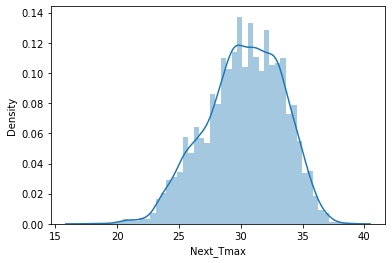

In [15]:
sns.distplot(DF.Next_Tmax)

<AxesSubplot:xlabel='Next_Tmin', ylabel='Density'>

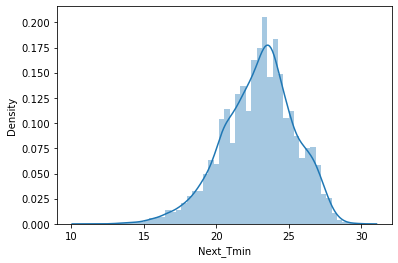

In [16]:
sns.distplot(DF.Next_Tmin)

Distributions are continuous and look slightly skewed.

#### Analyzing the Feature Columns

In [17]:
DF.dtypes[DF.dtypes == 'object'] #Identifying the Categorical Columns

Date    object
dtype: object

In [18]:
DF.Date.unique()

array(['30-06-2013', '01-07-2013', '02-07-2013', '03-07-2013',
       '04-07-2013', '05-07-2013', '06-07-2013', '07-07-2013',
       '08-07-2013', '09-07-2013', '10-07-2013', '11-07-2013',
       '12-07-2013', '13-07-2013', '14-07-2013', '15-07-2013',
       '16-07-2013', '17-07-2013', '18-07-2013', '19-07-2013',
       '20-07-2013', '21-07-2013', '22-07-2013', '23-07-2013',
       '24-07-2013', '25-07-2013', '26-07-2013', '27-07-2013',
       '28-07-2013', '29-07-2013', '30-07-2013', '31-07-2013',
       '01-08-2013', '02-08-2013', '03-08-2013', '04-08-2013',
       '05-08-2013', '06-08-2013', '07-08-2013', '08-08-2013',
       '09-08-2013', '11-08-2013', '12-08-2013', '13-08-2013',
       '14-08-2013', '15-08-2013', '16-08-2013', '17-08-2013',
       '18-08-2013', '19-08-2013', '20-08-2013', '21-08-2013',
       '22-08-2013', '23-08-2013', '24-08-2013', '25-08-2013',
       '26-08-2013', '27-08-2013', '28-08-2013', '29-08-2013',
       '30-08-2013', '30-06-2014', '01-07-2014', '02-07

In [19]:
DF.Date.value_counts()

20-08-2013    25
13-07-2013    25
30-08-2017    25
24-07-2014    25
30-08-2015    25
              ..
24-07-2015    22
06-07-2017    22
13-08-2015    22
23-08-2017    22
30-06-2017    16
Name: Date, Length: 307, dtype: int64

each date has 22-25 records of various attributes.

#### Extracting 'Day' and 'Month' and 'Year' columns from 'Date' Columnn

In [20]:
DF['Date']=pd.to_datetime(DF['Date']) #creating datetime type dataframe

In [21]:
DF['Day']=DF['Date'].apply(lambda d:d.day) #mapping day values to 'Day' column in main dataframe

In [22]:
DF['Month']=DF['Date'].apply(lambda m:m.month) #mapping month values to 'Month' column in main dataframe

In [23]:
DF['Year']=DF['Date'].apply(lambda y:y.year) #mapping month values to 'Year' column in main Date

In [24]:
DF.head()

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin,Day,Month,Year
0,1.0,2013-06-30,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,...,37.6046,126.991,212.3350,2.7850,5992.895996,29.1,21.2,30,6,2013
1,2.0,2013-06-30,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,...,37.6046,127.032,44.7624,0.5141,5869.312500,30.5,22.5,30,6,2013
2,3.0,2013-06-30,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,...,37.5776,127.058,33.3068,0.2661,5863.555664,31.1,23.9,30,6,2013
3,4.0,2013-06-30,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,...,37.6450,127.022,45.7160,2.5348,5856.964844,31.7,24.3,30,6,2013
4,5.0,2013-06-30,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,...,37.5507,127.135,35.0380,0.5055,5859.552246,31.2,22.5,30,6,2013


In [25]:
DF.dtypes[DF.dtypes != 'object'] #Identifying non object type Columns

station                    float64
Date                datetime64[ns]
Present_Tmax               float64
Present_Tmin               float64
LDAPS_RHmin                float64
LDAPS_RHmax                float64
LDAPS_Tmax_lapse           float64
LDAPS_Tmin_lapse           float64
LDAPS_WS                   float64
LDAPS_LH                   float64
LDAPS_CC1                  float64
LDAPS_CC2                  float64
LDAPS_CC3                  float64
LDAPS_CC4                  float64
LDAPS_PPT1                 float64
LDAPS_PPT2                 float64
LDAPS_PPT3                 float64
LDAPS_PPT4                 float64
lat                        float64
lon                        float64
DEM                        float64
Slope                      float64
Solar radiation            float64
Next_Tmax                  float64
Next_Tmin                  float64
Day                          int64
Month                        int64
Year                         int64
dtype: object

In [26]:
DF.nunique()

station               25
Date                 307
Present_Tmax         167
Present_Tmin         155
LDAPS_RHmin         7585
LDAPS_RHmax         7577
LDAPS_Tmax_lapse    7588
LDAPS_Tmin_lapse    7588
LDAPS_WS            7588
LDAPS_LH            7588
LDAPS_CC1           7485
LDAPS_CC2           7496
LDAPS_CC3           7512
LDAPS_CC4           7438
LDAPS_PPT1          2779
LDAPS_PPT2          2479
LDAPS_PPT3          2326
LDAPS_PPT4          1892
lat                   12
lon                   25
DEM                   25
Slope                 25
Solar radiation     1575
Next_Tmax            181
Next_Tmin            157
Day                   21
Month                 12
Year                   5
dtype: int64

In [27]:
DF.station.value_counts()

23.0    307
18.0    307
10.0    307
17.0    307
25.0    307
2.0     307
3.0     306
4.0     306
13.0    305
20.0    304
16.0    304
21.0    304
14.0    303
1.0     303
15.0    302
12.0    302
24.0    302
22.0    302
19.0    302
9.0     302
11.0    301
6.0     301
7.0     301
8.0     300
5.0     296
Name: station, dtype: int64

<AxesSubplot:xlabel='station', ylabel='count'>

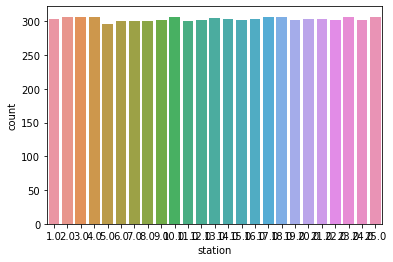

In [28]:
sns.countplot(DF.station)

Reports from all stations are fairly balanced.

In [29]:
DF.lat.value_counts()

37.5776    1214
37.5507    1204
37.6181     611
37.6046     610
37.5237     609
37.5372     608
37.4967     605
37.4697     604
37.5102     603
37.4562     307
37.4832     307
37.6450     306
Name: lat, dtype: int64

In [30]:
DF.lon.value_counts()

126.970    307
127.099    307
126.955    307
127.024    307
126.891    307
127.032    307
127.022    306
127.058    306
127.083    305
127.040    304
126.995    304
127.004    304
126.927    303
126.991    303
126.826    302
126.937    302
126.938    302
126.988    302
126.909    302
127.086    302
127.085    301
126.838    301
127.042    301
126.910    300
127.135    296
Name: lon, dtype: int64

lat and lon are cordinates of geolocations for which weather data from the stations are available.

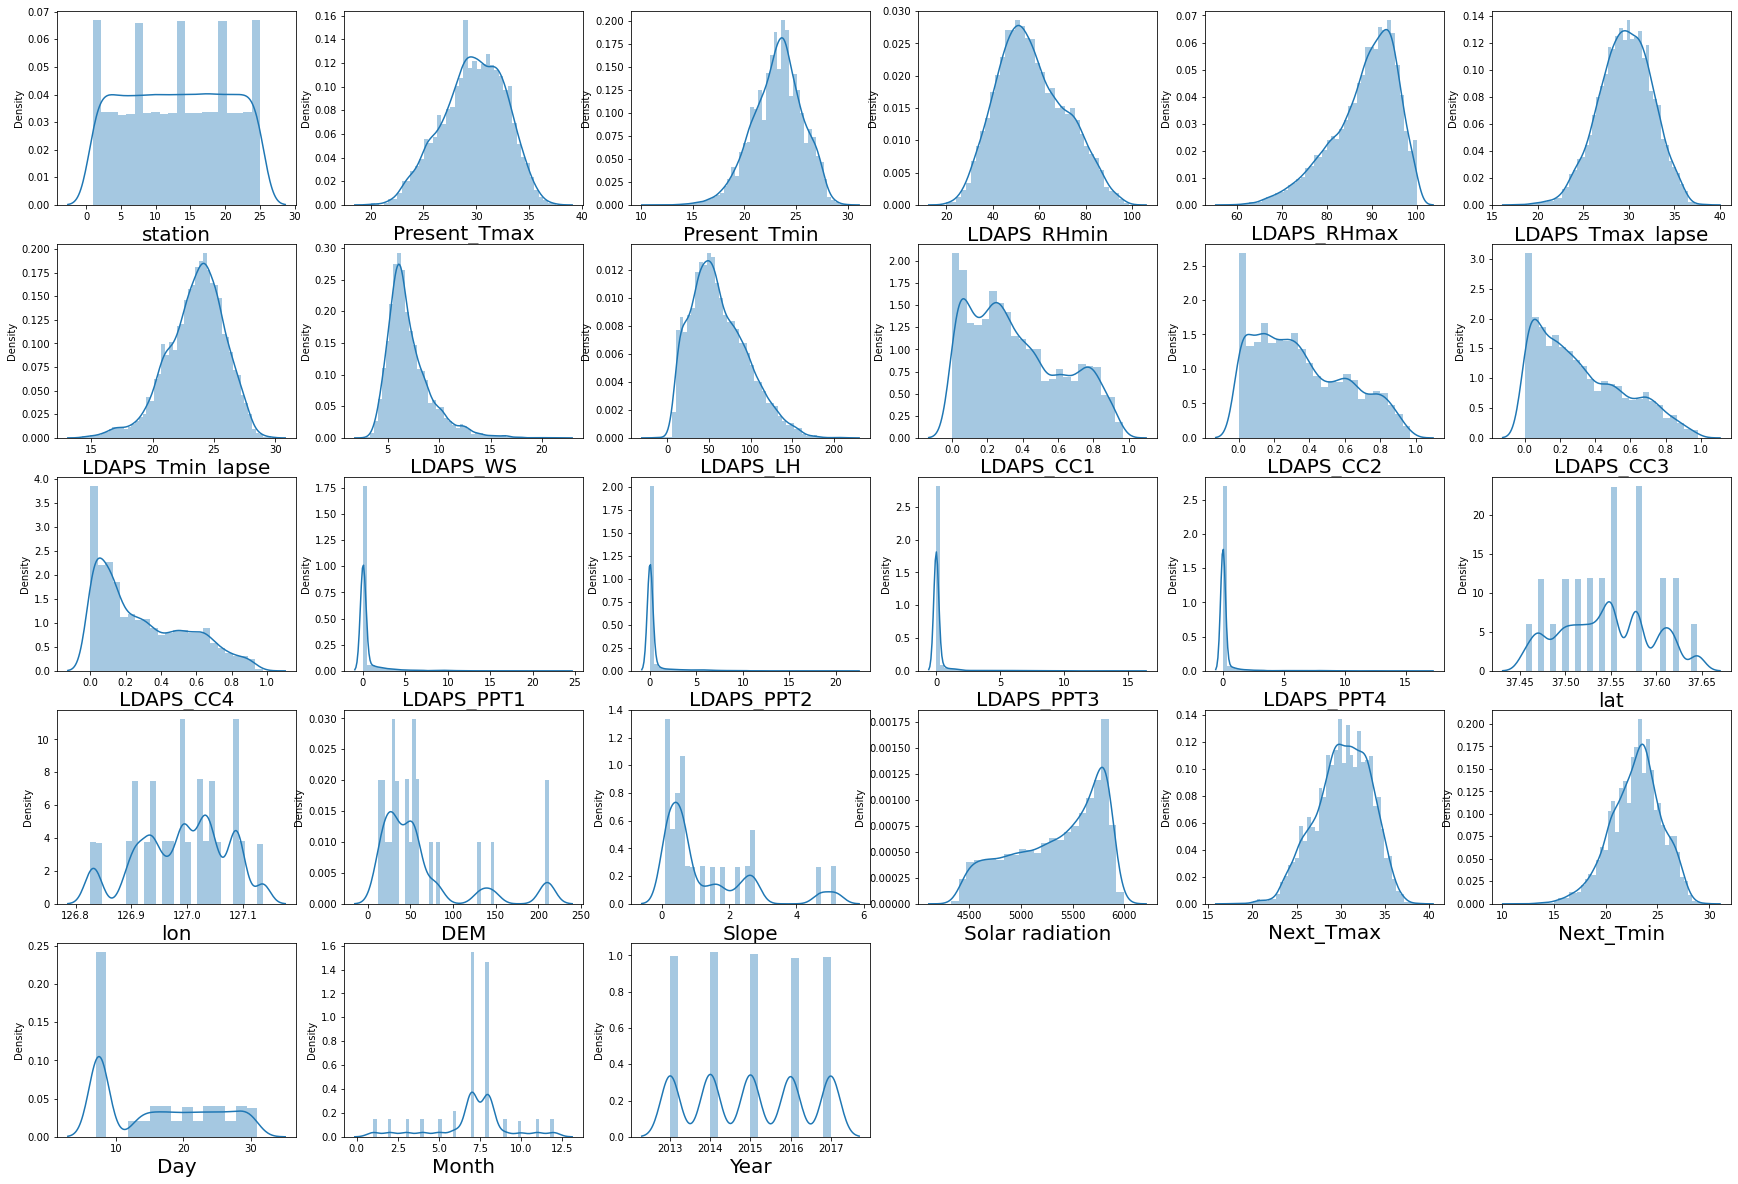

In [31]:
plt.figure(figsize=(30,25),facecolor='white')
plotnum=1
for col in DF.drop(columns=['Date']):
    if plotnum<=30:
        plt.subplot(6,6,plotnum)
        sns.distplot(DF[col])
        plt.xlabel(col,fontsize=20)
    plotnum+=1
plt.show()

Columns with continuous data distribution are skewed.

### Interpreting Relationship between Independent  and Dependent Variables

Grouping the data date-wise to better understand the relationship between 'Date' and 'Next_Tmax' and 'Next_Tmin'

In [32]:
DF.Date

0      2013-06-30
1      2013-06-30
2      2013-06-30
3      2013-06-30
4      2013-06-30
          ...    
7583   2017-08-30
7584   2017-08-30
7585   2017-08-30
7586   2017-08-30
7587   2017-08-30
Name: Date, Length: 7588, dtype: datetime64[ns]

In [33]:
DF.Date

0      2013-06-30
1      2013-06-30
2      2013-06-30
3      2013-06-30
4      2013-06-30
          ...    
7583   2017-08-30
7584   2017-08-30
7585   2017-08-30
7586   2017-08-30
7587   2017-08-30
Name: Date, Length: 7588, dtype: datetime64[ns]

Text(0.5, 1.0, 'Min Temperature Trend')

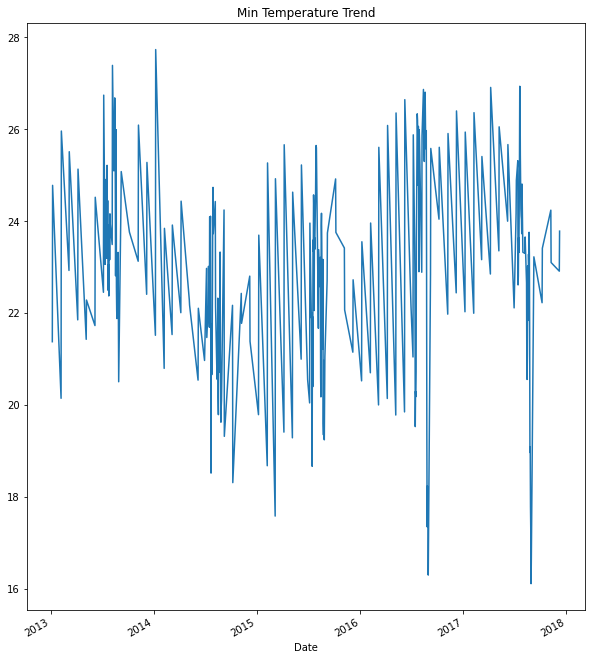

In [34]:
plt.figure(figsize=(10,12))
DF.groupby('Date').mean()['Next_Tmin'].plot()
plt.title('Min Temperature Trend')

Text(0.5, 1.0, 'Max Temperature Trend')

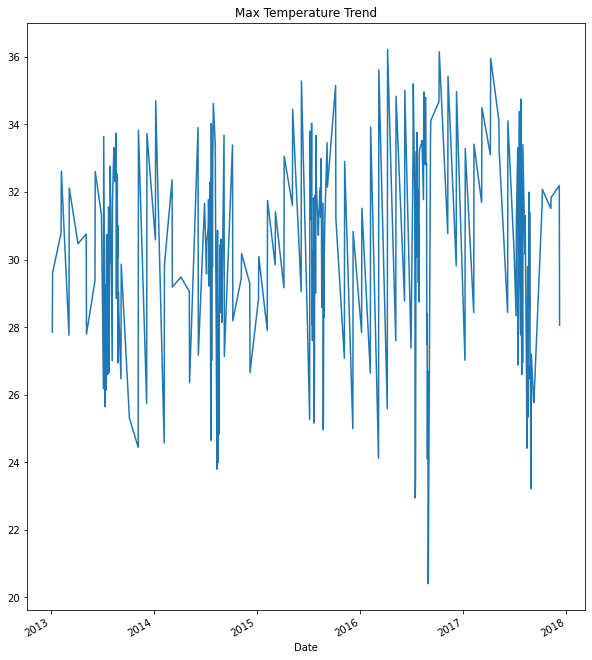

In [35]:
plt.figure(figsize=(10,12))
DF.groupby('Date').mean()['Next_Tmax'].plot()
plt.title('Max Temperature Trend')

Huge temperature dips are observed towards end of each year indicating peak winter season and Spikes towards the middle of each year indicating  peak summer seasson.

Gradual rise in peak temperatures can also be observed as one moves from 2013 to mid 2017

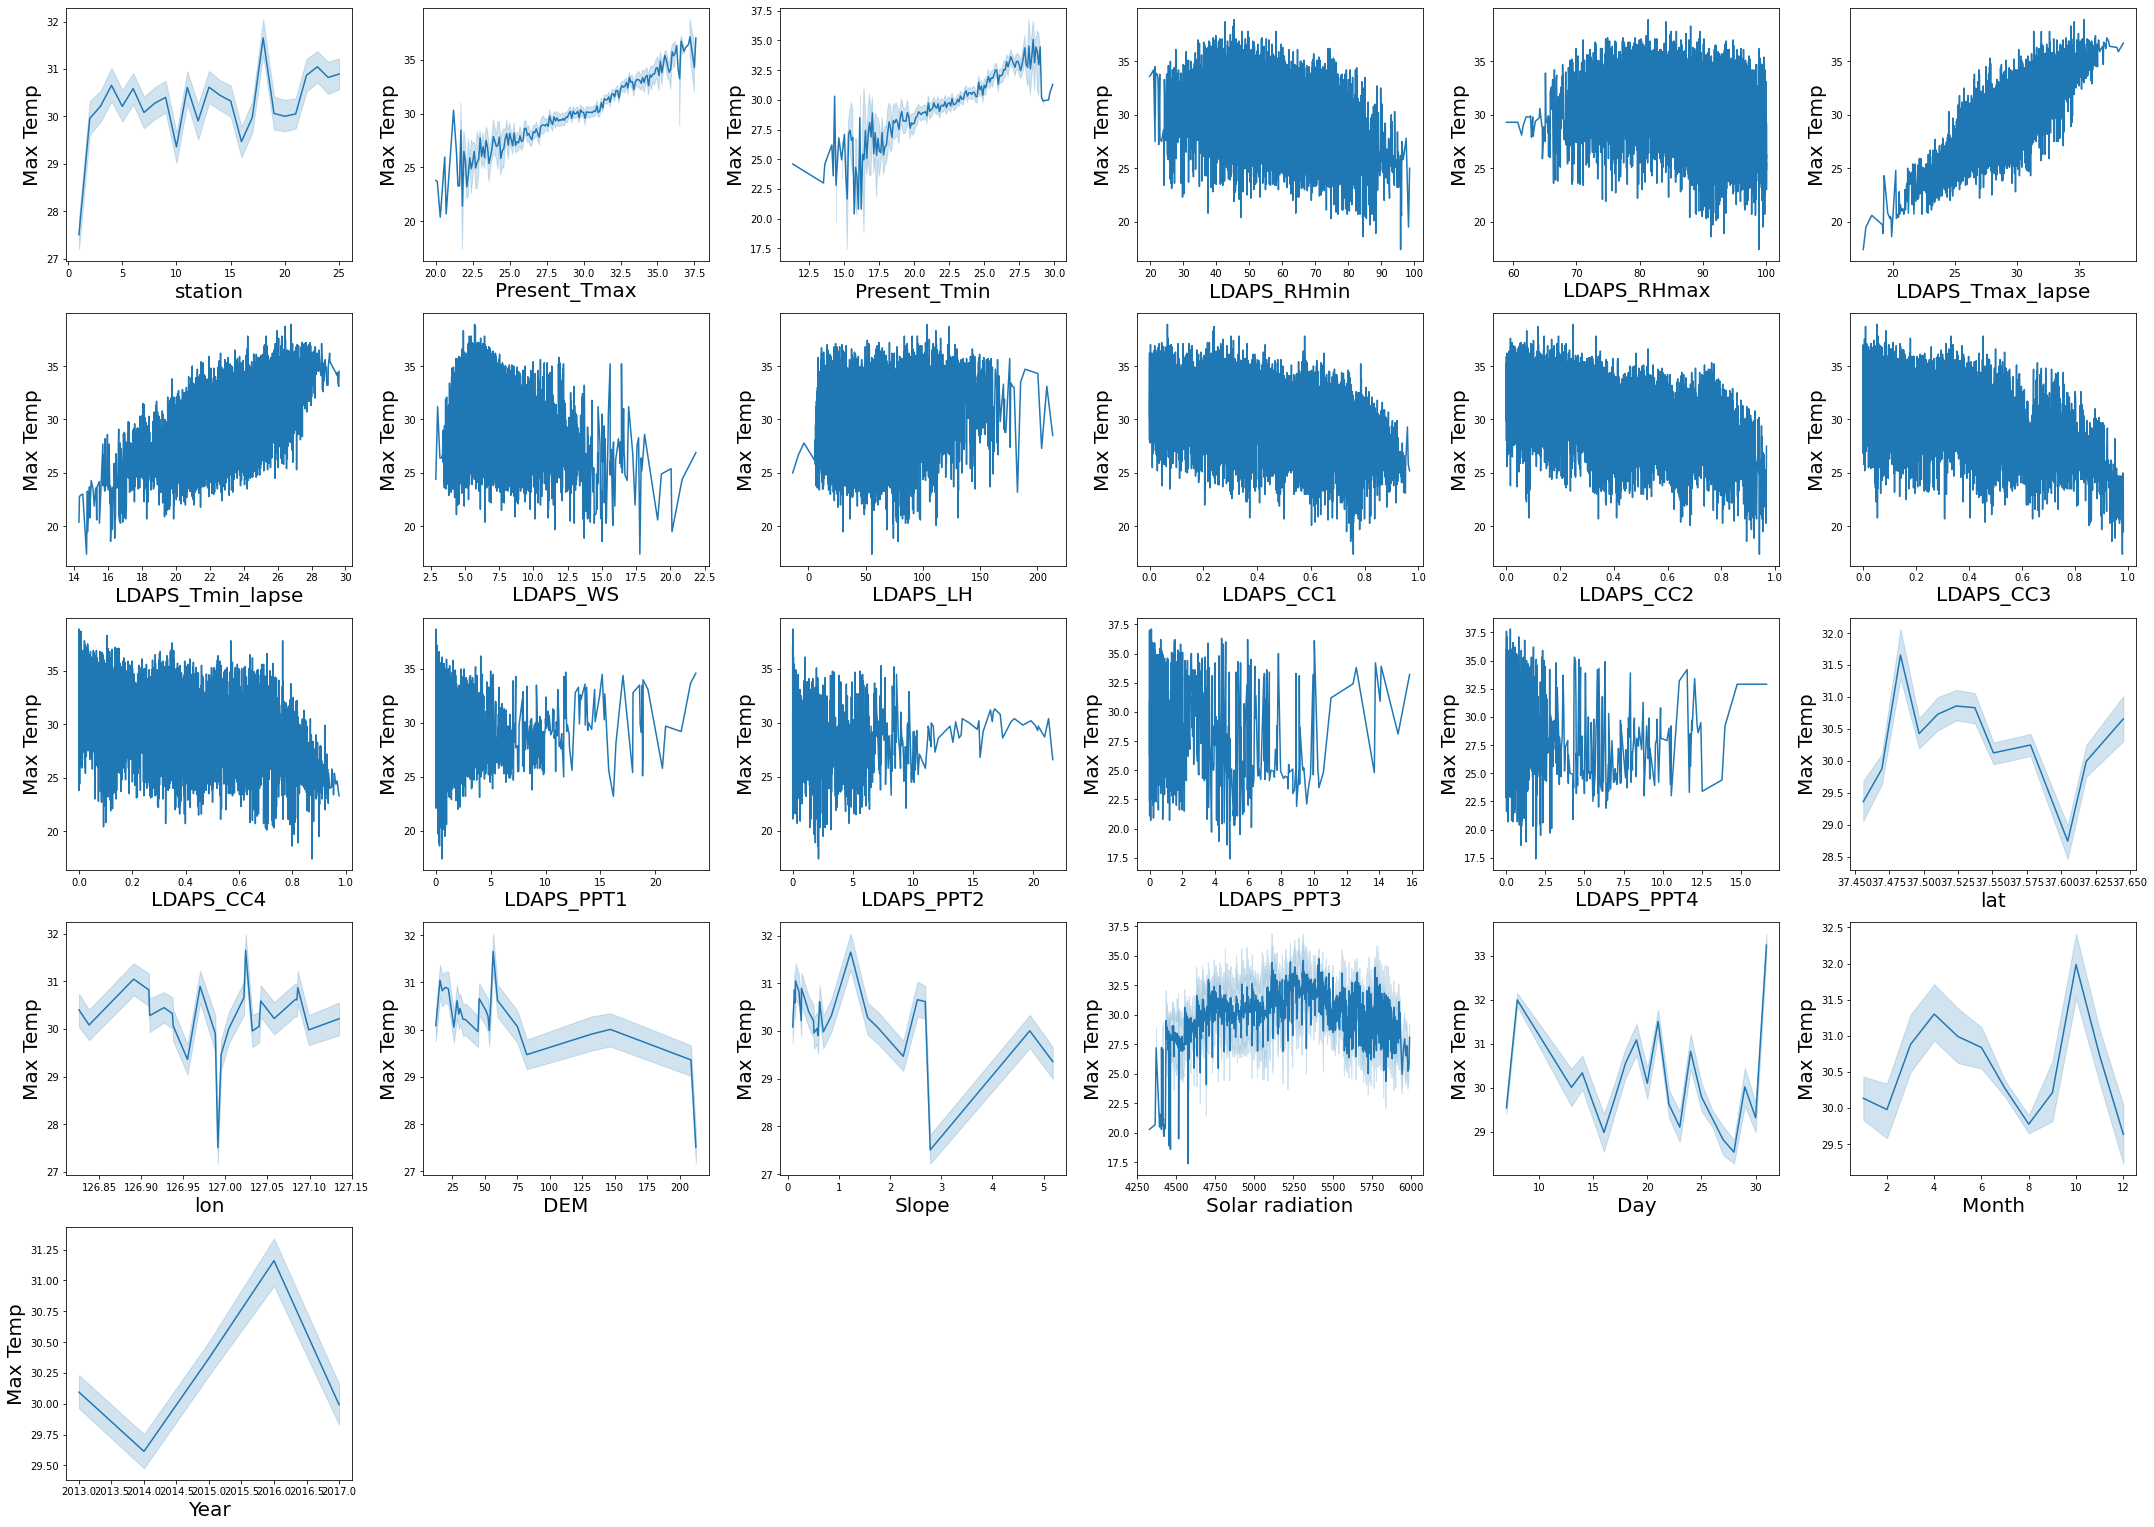

In [36]:
plt.figure(figsize=(30,25),facecolor='white')
plotnum=1
X  = DF.drop(columns=['Date','Next_Tmax','Next_Tmin'])
y = DF['Next_Tmax']
for col in X:
    if plotnum<=30:
        plt.subplot(6,6,plotnum)
        sns.lineplot(X[col],y)
        plt.xlabel(col,fontsize=20)
        plt.ylabel('Max Temp',fontsize=20)
    plotnum+=1
plt.tight_layout()

Some observations:

Present_Tmax,Present_Tmin,LDAPS_Tmin_lapse,LDAPS_Tmax_lapse have a linear postive relationship with Next_Tmax

Higher the max humidity, higher is the max temp, conversely lower the min humidity, higher is the max temp.

Higher max temp for higher latent heat flux.

LDAPS_CC1,LDAPS_CC2,LDAPS_CC3,LDAPS_CC4 show a negative linear relationship with Next_Tmax

LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4  are densely packed close to 0 implying lower precipitation and indicating that lower the precipiation higher the max temp.

There is a dip in max temp for specific latitude and longitude values indicating lower max temp in particular geolocations.
greater the Elevation lower is max temp

lower the slope gradient higher is the max temp

higher Solar radiation higher is the max temp

There has been a gradual rise in max temp over the years. Max temp peaks between april and may and in october and dips to its lowest in august and december

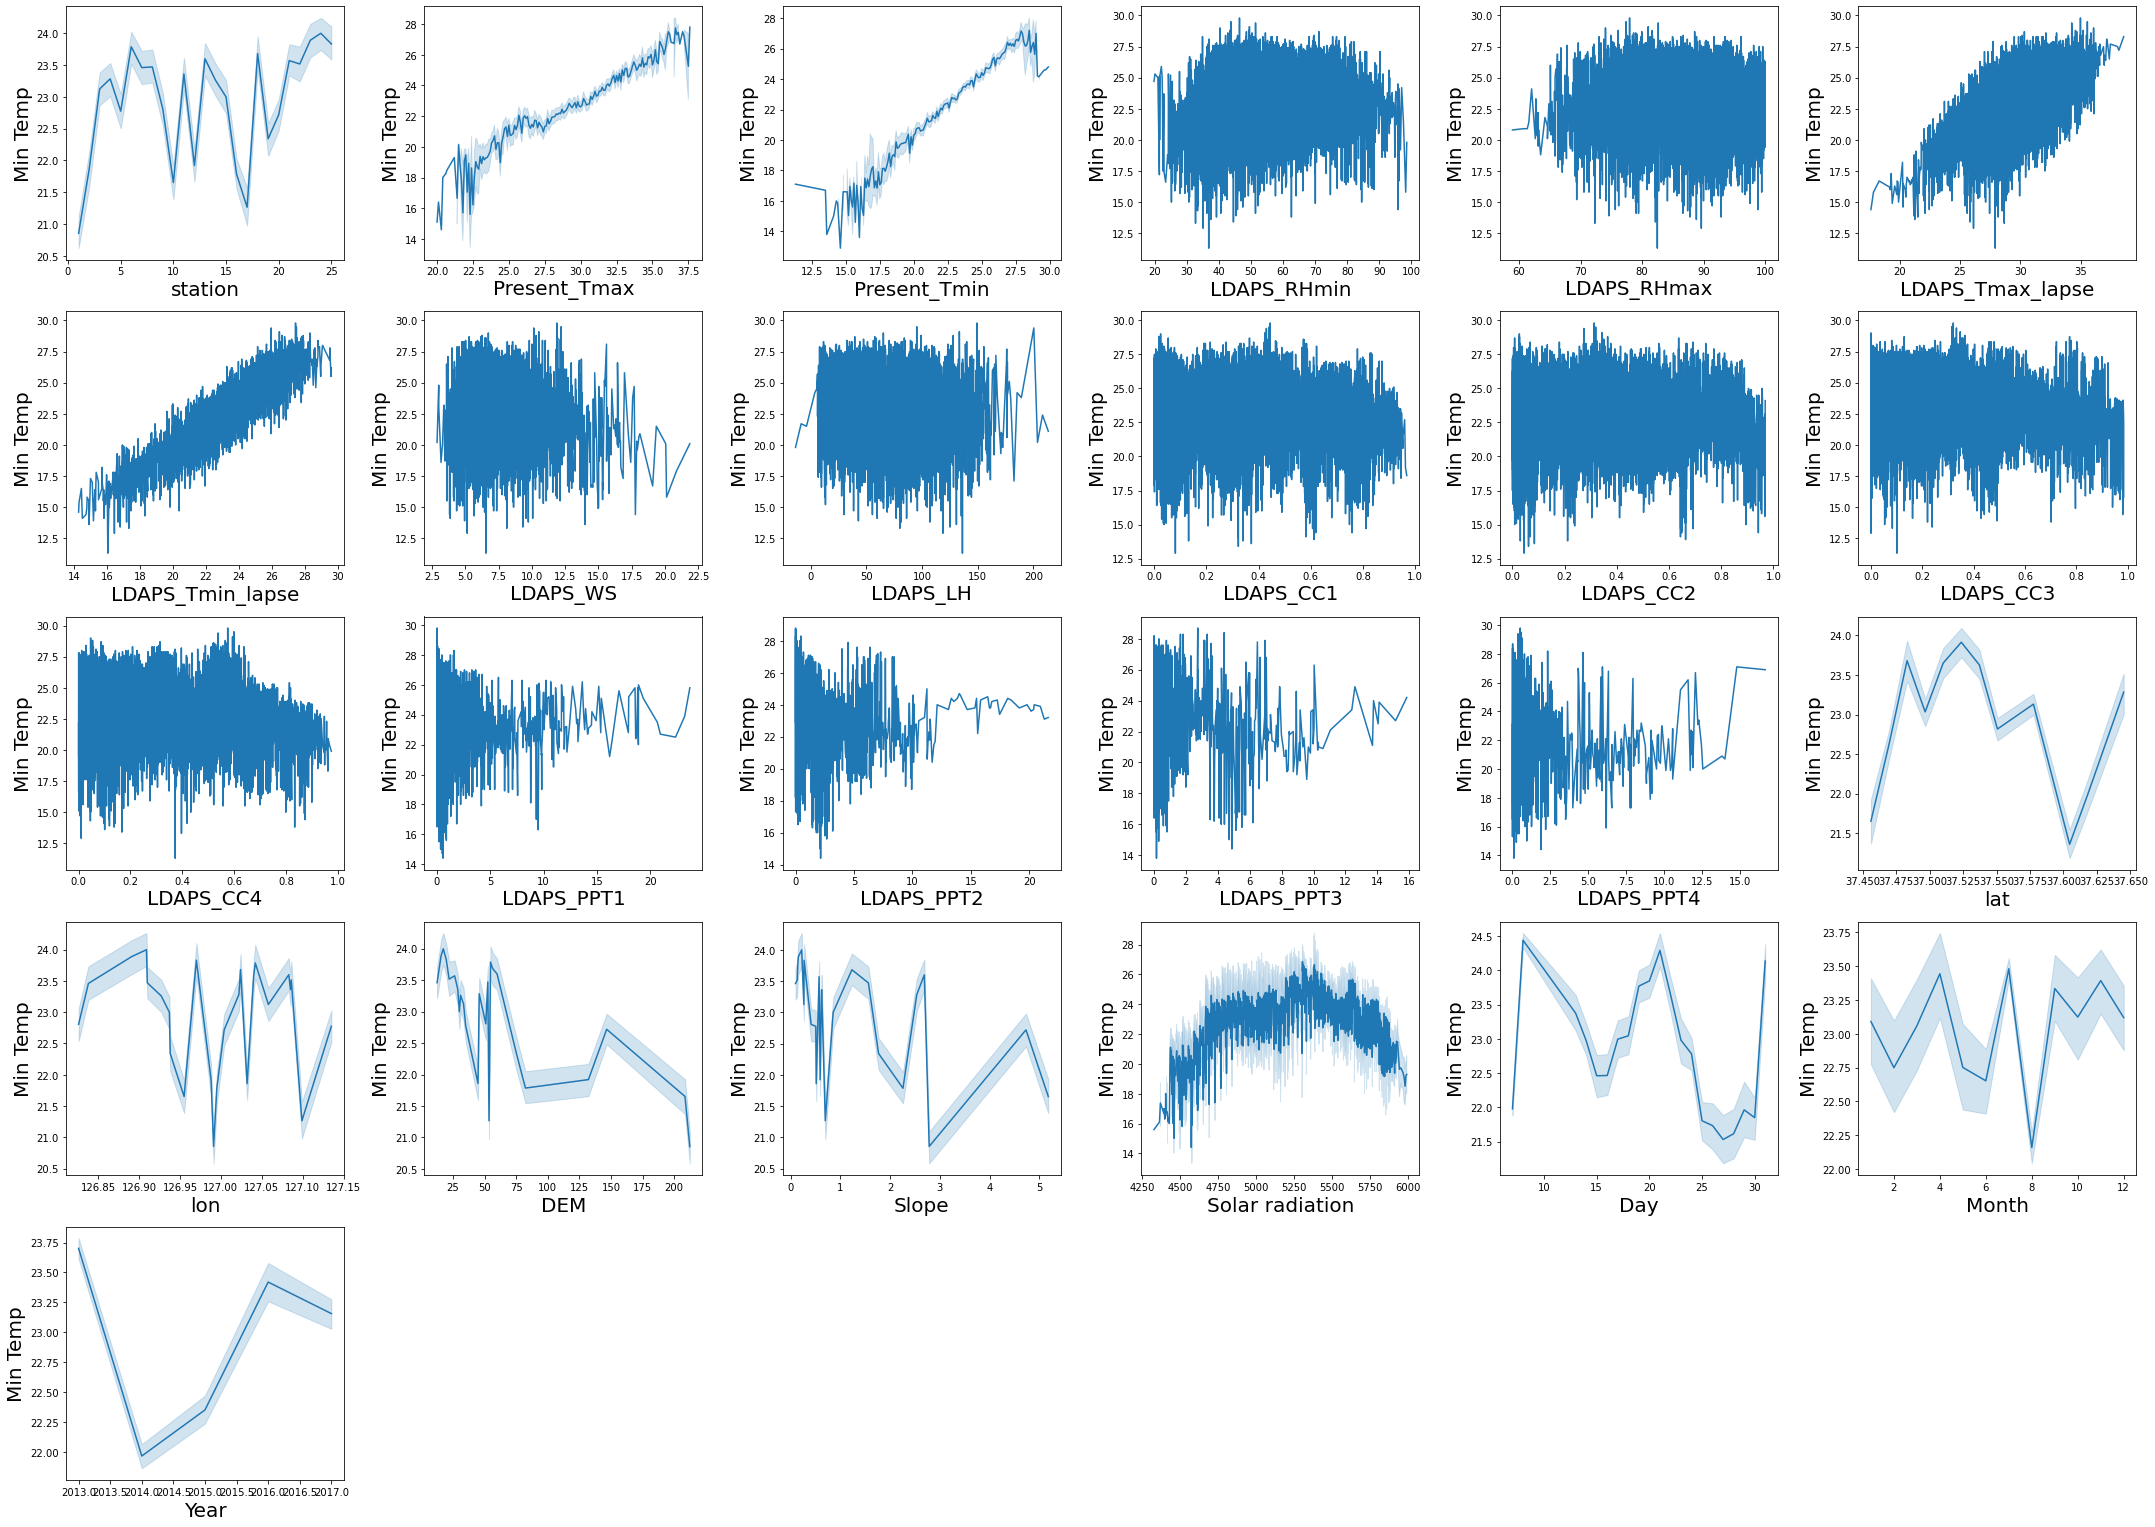

In [37]:
plt.figure(figsize=(30,25),facecolor='white')
plotnum=1
X  = DF.drop(columns=['Date','Next_Tmax','Next_Tmin'])
y = DF['Next_Tmin']
for col in X:
    if plotnum<=30:
        plt.subplot(6,6,plotnum)
        sns.lineplot(X[col],y)
        plt.xlabel(col,fontsize=20)
        plt.ylabel('Min Temp',fontsize=20)
    plotnum+=1
plt.tight_layout()

Some observations:

Present_Tmax,Present_Tmin,LDAPS_Tmin_lapse,LDAPS_Tmax_lapse have a linear postive relationship with Next_Tmin

Higher the max humidity, higher is the min temp, conversely lower the min humidity, higher is the min temp.

Higher min temp for higher latent heat flux.

LDAPS_CC1,LDAPS_CC2,LDAPS_CC3,LDAPS_CC4 do not show a strong linear relationship with Next_Tmin

LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4 are densely packed close to 0 implying lower precipitation and indicating that lower the precipiation higher the min temp.

There is a dip in max temp for specific latitude and longitude values indicating lower max temp in particular geolocations. 

Greater the Elevation lower is min temp

lower the slope gradient higher is thhe min temp

higher Solar radiation higher is the min temp

There has been a gradual rise in min temp over the years. 

Min temp peaks in april and july and dips to its lowest in august

### Lets check for Outliers in continuous data type Features.

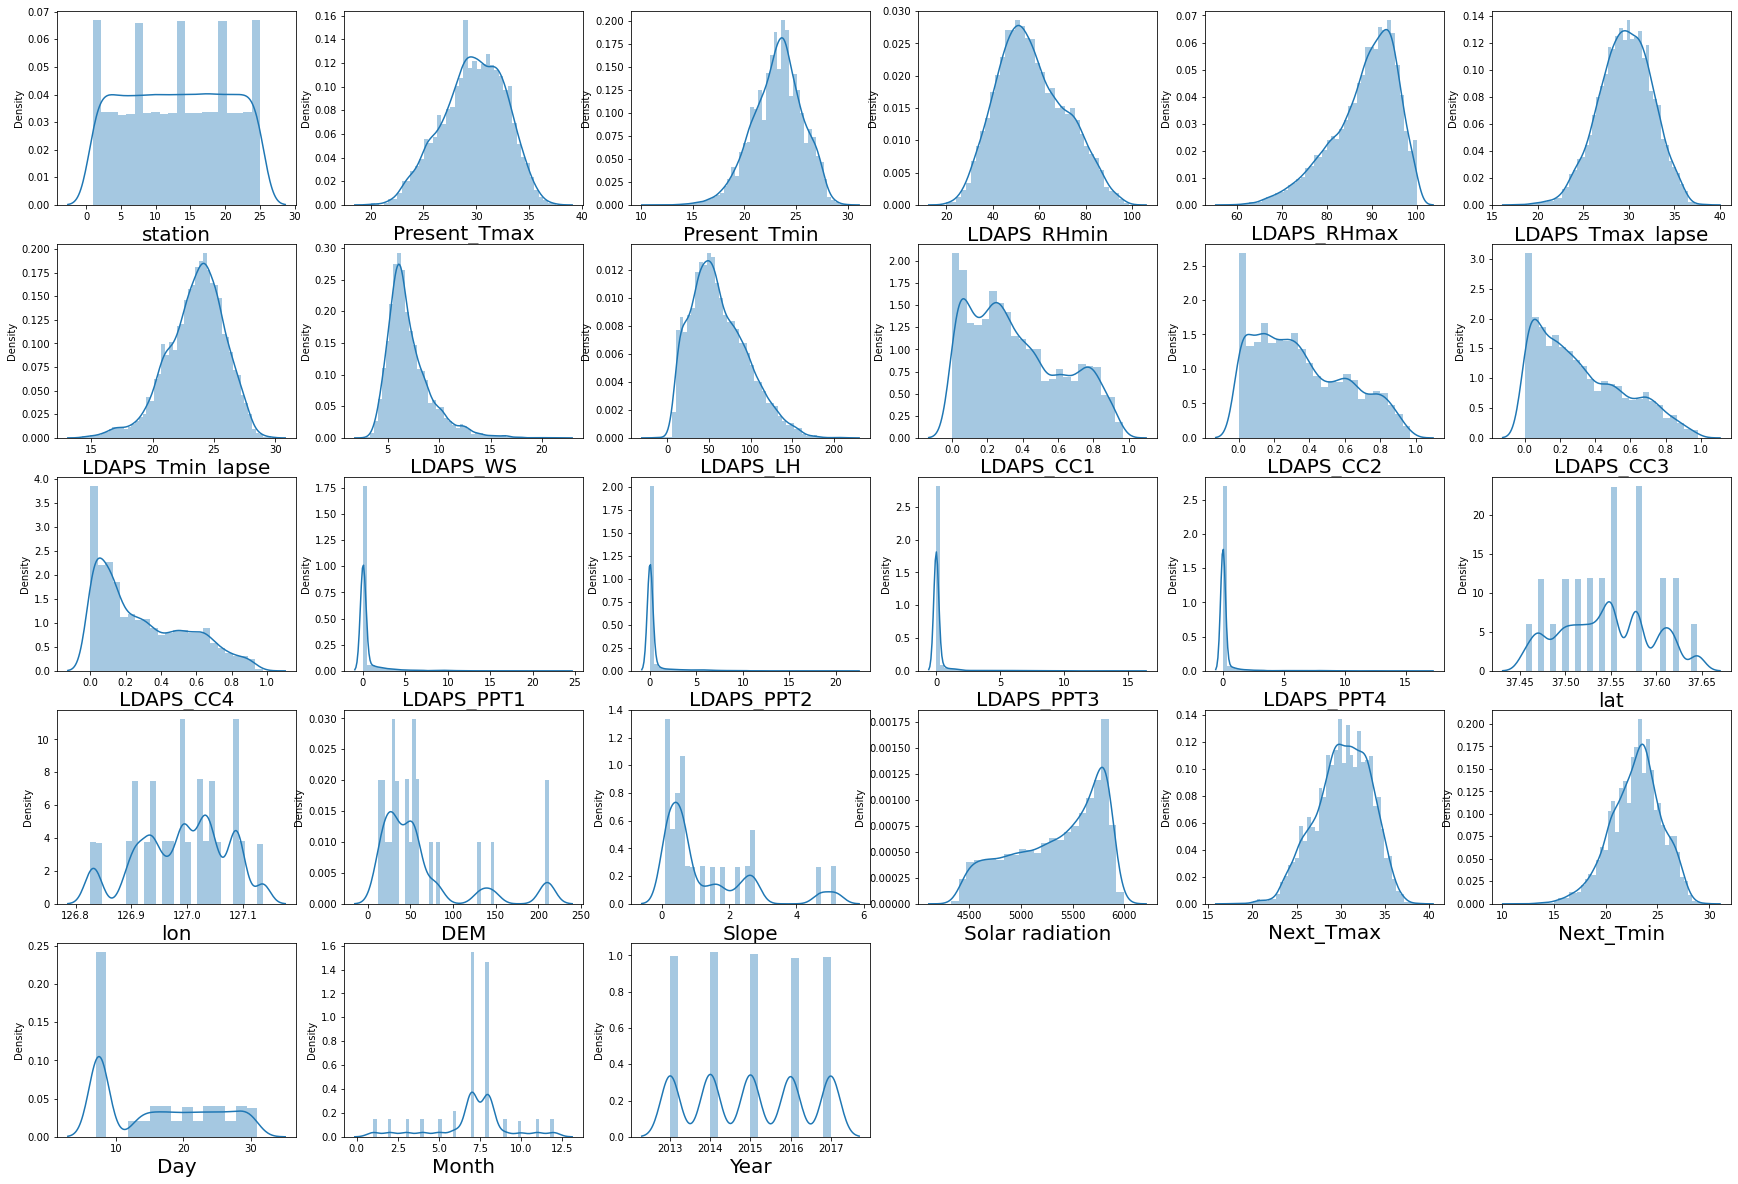

In [38]:
plt.figure(figsize=(30,25),facecolor='white')
plotnum=1
for col in DF.drop(columns=['Date']):
    if plotnum<=30:
        plt.subplot(6,6,plotnum)
        sns.distplot(DF[col])
        plt.xlabel(col,fontsize=20)
    plotnum+=1
plt.show()

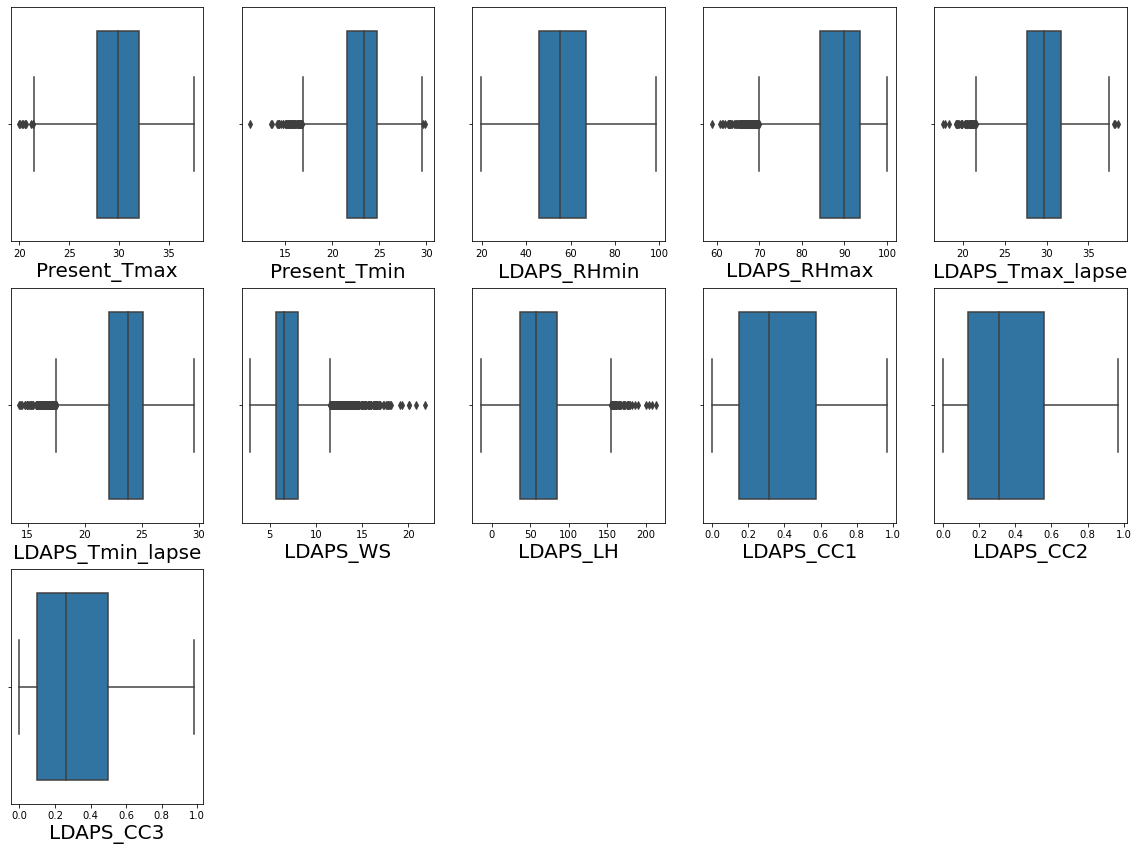

In [39]:
plt.figure(figsize=(20,25),facecolor='white')
plotnum=1
for col in DF.drop(columns = ['Next_Tmin','Next_Tmax','Date','Year','Month','Day','Slope','DEM','lon','lat','Slope','station'],axis=1):
    if plotnum<=11:
        plt.subplot(5,5,plotnum)
        sns.boxplot(DF[col])
        plt.xlabel(col,fontsize=20)
    plotnum+=1
plt.show()

Outliers exist in Present_Tmax,Present_Tmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS and LDAPS_LH

### Removing Outliers

#### Using IQR Method

In [40]:
df =DF[['Present_Tmax','Present_Tmin','LDAPS_RHmax','LDAPS_Tmax_lapse','LDAPS_Tmin_lapse','LDAPS_WS','LDAPS_LH']].copy() #making a copy of all outlier affected continuous data type columns.

In [41]:
indxdrop = np.array([])
for colm in df:
    q1 = df[colm].quantile(0.25)
    q3 = df[colm].quantile(0.75)
    iqr = q3-q1
    upperval = q3 + (1.5*iqr)
    lowerval = q1 - (1.5*iqr)
    col = df[colm]
    indx = col[(col > upperval) | (col < lowerval)].index
    indxdrop = np.append(indxdrop, indx)
# find all the indices of outliers in the columns using IQR and append them to indxdrop array 

In [42]:
df = df.drop(indxdrop)

In [43]:
df.shape

(6924, 7)

##### Data loss %:

In [44]:
loss=(7588-6924)/7588 * 100
loss

8.75065893516078

8.75% data loss is acceptable

#### Therefore, Using IQR method to reduce outliers

In [45]:
dropindx = DF.index.difference(df.index)

In [46]:
dropindx

Int64Index([  25,   27,   28,   29,   30,   31,   32,   33,   34,   35,
            ...
            7572, 7573, 7574, 7575, 7577, 7578, 7579, 7580, 7581, 7582],
           dtype='int64', length=664)

In [47]:
DF.drop(dropindx,inplace = True) #dropping the outliers from original features Dataframe


In [48]:
DF.shape

(6924, 28)

In [49]:
DF.reset_index(drop=True,inplace = True) #resetting the index of the dataframe

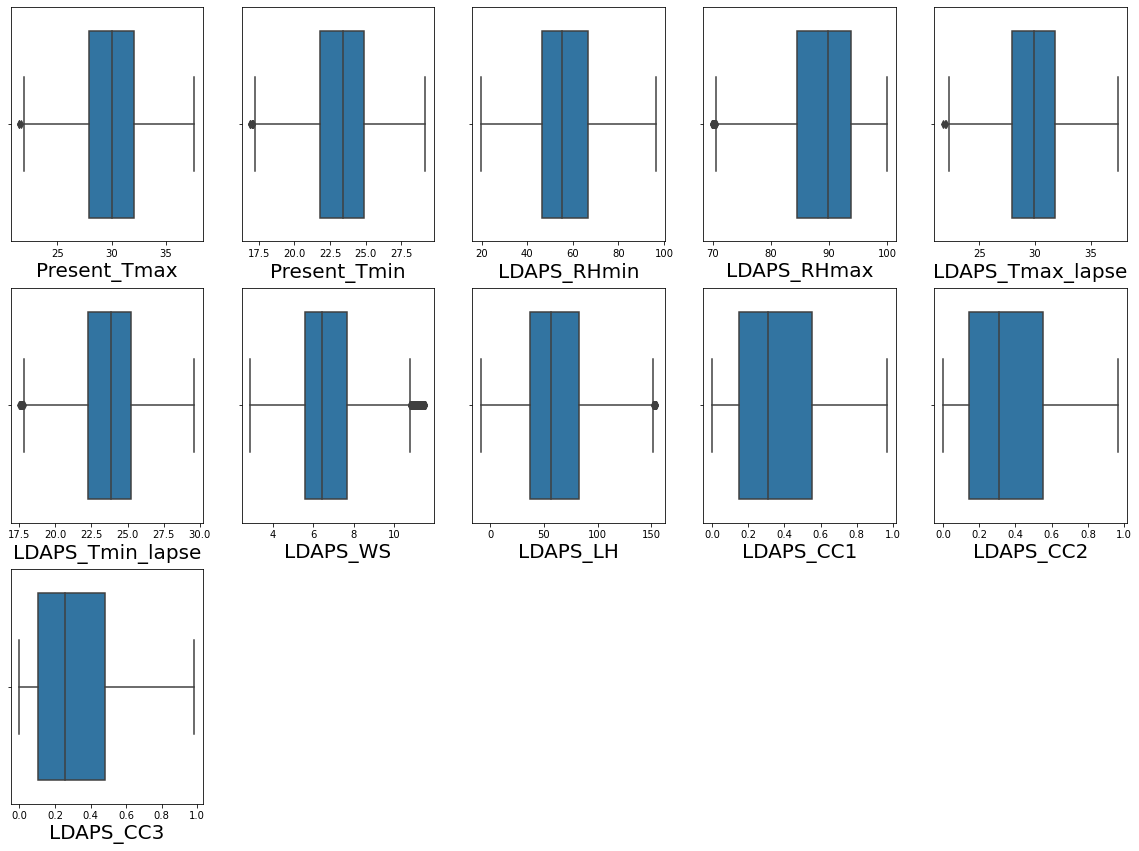

In [50]:
plt.figure(figsize=(20,25),facecolor='white')
plotnum=1
for col in DF.drop(columns = ['Next_Tmin','Next_Tmax','Date','Year','Month','Day','Slope','DEM','lon','lat','Slope','station'],axis=1):
    if plotnum<=11:
        plt.subplot(5,5,plotnum)
        sns.boxplot(DF[col])
        plt.xlabel(col,fontsize=20)
    plotnum+=1
plt.show()

Some outliers have been removed

### Checking for skewness in data distributions

In [51]:
DF.drop(columns = ['Next_Tmin','Next_Tmax','Date','Year','Month','Day','Slope','DEM','lon','lat','Slope','station'],axis=1).skew()

Present_Tmax       -0.228700
Present_Tmin       -0.142306
LDAPS_RHmin         0.285158
LDAPS_RHmax        -0.651586
LDAPS_Tmax_lapse   -0.083575
LDAPS_Tmin_lapse   -0.246843
LDAPS_WS            0.696573
LDAPS_LH            0.554565
LDAPS_CC1           0.510456
LDAPS_CC2           0.480710
LDAPS_CC3           0.663541
LDAPS_CC4           0.704973
LDAPS_PPT1          5.289903
LDAPS_PPT2          5.903476
LDAPS_PPT3          6.767674
LDAPS_PPT4          6.866468
Solar radiation    -0.505057
dtype: float64

LDAPS_RHmax,LDAPS_WS,LDAPS_CC3,LDAPS_CC4,LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT4 are skewed.

#### Normalizing Data Distribution using PowerTransformer

In [52]:
from sklearn.preprocessing import PowerTransformer

In [53]:
powtrans= PowerTransformer(method='yeo-johnson', standardize=True)

In [54]:
df4 = DF[['LDAPS_PPT3','LDAPS_RHmax','LDAPS_WS','LDAPS_CC3','LDAPS_CC4','LDAPS_PPT1','LDAPS_PPT2','LDAPS_PPT4']]

In [55]:
transformed= powtrans.fit_transform(df4)

In [56]:
type(transformed)

numpy.ndarray

In [57]:
transformed = pd.DataFrame(transformed, columns=df4.columns) #to convert numpy array back into dataframe


In [58]:
transformed.skew()

LDAPS_PPT3     1.902106
LDAPS_RHmax   -0.108084
LDAPS_WS       0.007892
LDAPS_CC3      0.087604
LDAPS_CC4      0.134250
LDAPS_PPT1     1.530941
LDAPS_PPT2     1.683410
LDAPS_PPT4     2.177824
dtype: float64

In [59]:
transformed.index = DF.index

In [60]:
Skewed = ['LDAPS_PPT3','LDAPS_RHmax','LDAPS_WS','LDAPS_CC3','LDAPS_CC4','LDAPS_PPT1','LDAPS_PPT2','LDAPS_PPT4']

In [61]:
DF[Skewed] = transformed[Skewed]

In [62]:
DF.skew()

station             0.004586
Present_Tmax       -0.228700
Present_Tmin       -0.142306
LDAPS_RHmin         0.285158
LDAPS_RHmax        -0.108084
LDAPS_Tmax_lapse   -0.083575
LDAPS_Tmin_lapse   -0.246843
LDAPS_WS            0.007892
LDAPS_LH            0.554565
LDAPS_CC1           0.510456
LDAPS_CC2           0.480710
LDAPS_CC3           0.087604
LDAPS_CC4           0.134250
LDAPS_PPT1          1.530941
LDAPS_PPT2          1.683410
LDAPS_PPT3          1.902106
LDAPS_PPT4          2.177824
lat                 0.114949
lon                -0.302020
DEM                 1.815543
Slope               1.615198
Solar radiation    -0.505057
Next_Tmax          -0.281289
Next_Tmin          -0.200883
Day                 0.267914
Month              -0.685186
Year                0.027634
dtype: float64

In [63]:
df5=DF[['LDAPS_LH','LDAPS_CC1']]

In [64]:
df6=np.sqrt(df5)

In [65]:
df6.index = DF.index

In [66]:
Skewed=['LDAPS_LH','LDAPS_CC1']

In [67]:
DF[Skewed] = df6[Skewed]

In [69]:
df5=DF[['DEM','Slope']]

In [70]:
df6=np.log(df5)

In [71]:
df6.index = DF.index

In [72]:
Skewed=['DEM','Slope']

In [73]:
DF[Skewed] = df6[Skewed]

In [83]:
DF.skew()

station             0.004586
Present_Tmax       -0.228700
Present_Tmin       -0.142306
LDAPS_RHmin         0.285158
LDAPS_RHmax        -0.108084
LDAPS_Tmax_lapse   -0.083575
LDAPS_Tmin_lapse   -0.246843
LDAPS_WS            0.007892
LDAPS_LH           -0.011927
LDAPS_CC1          -0.202403
LDAPS_CC2           0.480710
LDAPS_CC3           0.087604
LDAPS_CC4           0.134250
LDAPS_PPT1          1.530941
LDAPS_PPT2          1.683410
LDAPS_PPT3          1.902106
LDAPS_PPT4          2.177824
lat                 0.114949
lon                -0.302020
DEM                 0.428089
Slope               0.073653
Solar radiation    -0.505057
Next_Tmax          -0.281289
Next_Tmin          -0.200883
Day                 0.267914
Month              -0.685186
Year                0.027634
dtype: float64

Lots of skewness has been removed

####  Encoding 'Year' column

In [84]:
DF

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin,Day,Month,Year
0,1.0,2013-06-30,28.7,21.4,58.255688,0.273249,28.074101,23.006936,0.184487,8.333775,...,37.6046,126.991,5.358165,1.024248,5992.895996,29.1,21.2,30,6,2013
1,2.0,2013-06-30,31.9,21.6,52.263397,0.183453,29.850689,24.035009,-0.598038,7.206764,...,37.6046,127.032,3.801369,-0.665337,5869.312500,30.5,22.5,30,6,2013
2,3.0,2013-06-30,31.6,23.3,48.690479,-0.817111,30.091292,24.565633,-0.267615,4.535752,...,37.5776,127.058,3.505762,-1.323883,5863.555664,31.1,23.9,30,6,2013
3,4.0,2013-06-30,32.0,23.4,58.239788,1.339166,29.704629,23.326177,-0.630582,8.107228,...,37.6450,127.022,3.822448,0.930115,5856.964844,31.7,24.3,30,6,2013
4,5.0,2013-06-30,31.4,21.9,56.174095,0.106135,29.113934,23.486480,-0.564797,10.390647,...,37.5507,127.135,3.556433,-0.682207,5859.552246,31.2,22.5,30,6,2013
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6919,21.0,2017-08-30,23.1,17.8,24.688997,-1.467672,27.812697,18.303014,0.047380,3.100657,...,37.5507,127.040,3.269493,-0.558441,4456.024414,27.6,17.7,30,8,2017
6920,22.0,2017-08-30,22.5,17.4,30.094858,-0.853664,26.704905,17.814038,-0.539494,9.063482,...,37.5102,127.086,3.089532,-2.015904,4441.803711,28.0,17.1,30,8,2017
6921,23.0,2017-08-30,23.3,17.1,26.741310,-1.406492,26.352081,18.775678,-0.260053,8.488716,...,37.5372,126.891,2.746476,-1.861753,4443.313965,28.3,18.1,30,8,2017
6922,24.0,2017-08-30,23.3,17.7,24.040634,-1.561170,27.010193,18.733519,0.007980,6.873242,...,37.5237,126.909,2.850452,-1.503727,4438.373535,28.6,18.8,30,8,2017


In [85]:
DF.Year.unique()

array([2013, 2014, 2015, 2016, 2017], dtype=int64)

In [86]:
DF['Year'] = DF.Year.map({2013:1,2014:2,2015:3,2016:4,2017:5})

In [87]:
DF.Year

0       1
1       1
2       1
3       1
4       1
       ..
6919    5
6920    5
6921    5
6922    5
6923    5
Name: Year, Length: 6924, dtype: int64

In [102]:
DF.isnull().sum()

Present_Tmax        0
Present_Tmin        0
LDAPS_RHmin         0
LDAPS_RHmax         0
LDAPS_Tmax_lapse    0
LDAPS_Tmin_lapse    0
LDAPS_WS            0
LDAPS_LH            1
LDAPS_CC1           0
LDAPS_CC2           0
LDAPS_CC3           0
LDAPS_CC4           0
LDAPS_PPT1          0
LDAPS_PPT2          0
LDAPS_PPT3          0
LDAPS_PPT4          0
lat                 0
lon                 0
DEM                 0
Slope               0
Solar radiation     0
Next_Tmax           0
Next_Tmin           0
Day                 0
Month               0
Year                0
dtype: int64

In [103]:
DF.dropna(inplace=True)

### Finding Correlation 

In [104]:
t_corr =DF.corr()

In [105]:
t_corr

,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,LDAPS_CC2,...,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin,Day,Month,Year
Present_Tmax,1.000000,0.600725,-0.216762,-0.355971,0.550275,0.614909,-0.103326,0.125454,-0.319559,-0.218848,...,-0.042717,0.016115,-0.130247,-0.083107,-0.092477,0.599745,0.608609,-0.116875,0.032356,0.096482
Present_Tmin,0.600725,1.000000,0.108221,-0.074305,0.424727,0.753244,0.029202,-0.004124,0.103280,0.091739,...,-0.067503,-0.032752,-0.250386,-0.168271,-0.023165,0.424064,0.777821,-0.053334,0.011897,0.096787
LDAPS_RHmin,-0.216762,0.108221,1.000000,0.579187,-0.605154,0.082352,0.205731,-0.033436,0.595205,0.742185,...,0.077006,-0.078581,0.048482,0.053992,0.245982,-0.466969,0.087952,-0.052885,-0.075134,0.015985
LDAPS_RHmax,-0.355971,-0.074305,0.579187,1.000000,-0.436749,-0.201098,0.105018,0.262900,0.440984,0.405889,...,0.222210,0.007107,0.167846,0.185847,0.176469,-0.353121,-0.142213,-0.007770,-0.060758,-0.150296
LDAPS_Tmax_lapse,0.550275,0.424727,-0.605154,-0.436749,1.000000,0.610287,-0.164318,0.037715,-0.417860,-0.544263,...,-0.025962,0.099934,-0.114129,-0.084231,-0.015263,0.812510,0.543951,-0.114967,0.013224,0.060629
LDAPS_Tmin_lapse,0.614909,0.753244,0.082352,-0.201098,0.610287,1.000000,0.004804,-0.135407,0.064067,0.059494,...,-0.085196,-0.019707,-0.182916,-0.157519,0.068407,0.544758,0.871178,-0.111175,0.001158,0.068839
LDAPS_WS,-0.103326,0.029202,0.205731,0.105018,-0.164318,0.004804,1.000000,-0.084723,0.201823,0.199976,...,-0.028740,-0.060789,0.113921,0.090896,0.180199,-0.214886,0.027853,-0.060999,-0.091212,-0.110040
LDAPS_LH,0.125454,-0.004124,-0.033436,0.262900,0.037715,-0.135407,-0.084723,1.000000,-0.145141,-0.233050,...,0.091496,0.011274,0.071434,0.038654,-0.040229,0.168542,-0.045287,-0.010506,-0.023727,0.043714
LDAPS_CC1,-0.319559,0.103280,0.595205,0.440984,-0.417860,0.064067,0.201823,-0.145141,1.000000,0.770464,...,-0.022135,-0.004401,-0.045625,-0.045662,0.217288,-0.426939,0.038572,-0.020867,-0.095628,-0.066279
LDAPS_CC2,-0.218848,0.091739,0.742185,0.405889,-0.544263,0.059494,0.199976,-0.233050,0.770464,1.000000,...,-0.004180,0.003506,-0.044451,-0.043390,0.177436,-0.510303,0.039325,0.011000,-0.092649,-0.036487


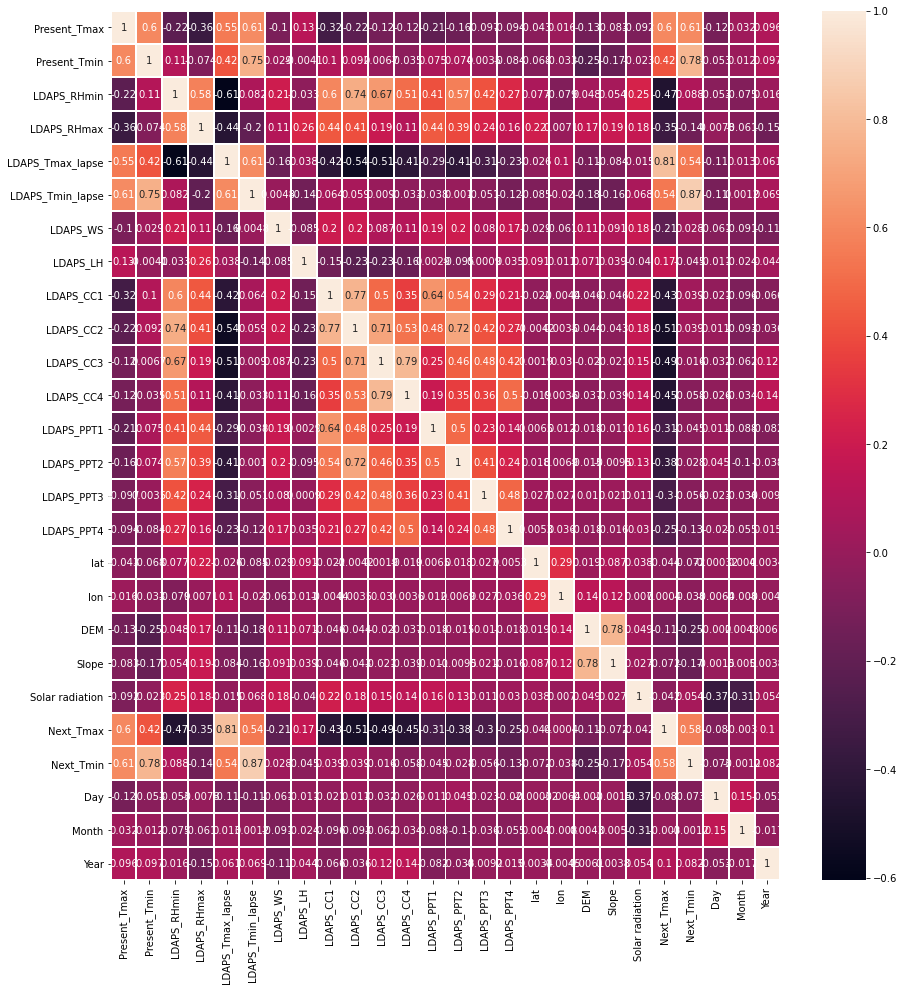

In [106]:
plt.figure(figsize=(15,16))
sns.heatmap(t_corr,annot=True,linewidth=1)
plt.show()

### Visualizing correlation of feature columns with label column.

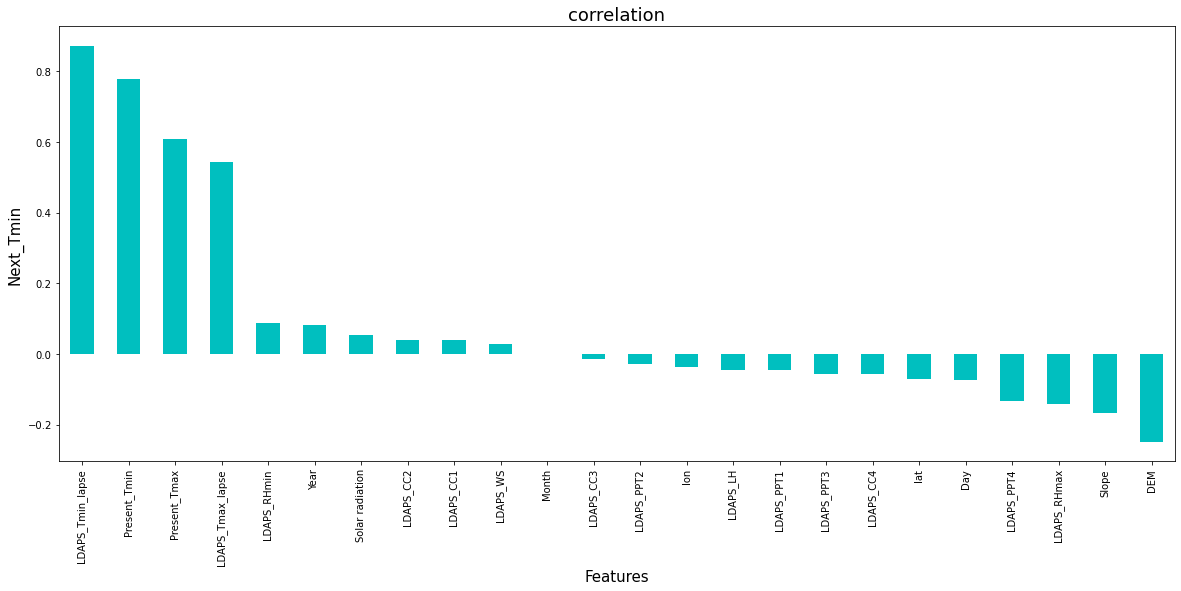

In [107]:
plt.figure(figsize = (20,8))
DF.corr()['Next_Tmin'].sort_values(ascending = False).drop(['Next_Tmin','Next_Tmax']).plot(kind='bar',color = 'c')
plt.xlabel('Features',fontsize=15)
plt.ylabel('Next_Tmin',fontsize=15)
plt.title('correlation',fontsize = 18)
plt.show()

LDAPS_Tmin_lapse,Present_Tmin,Present_Tmax,LDAPS_Tmax_lapse have the highest positive correlation with Next_Tmin while, DEM, slope,LDAPS_PPT4 have the highest negative correlation with Next_Tmin

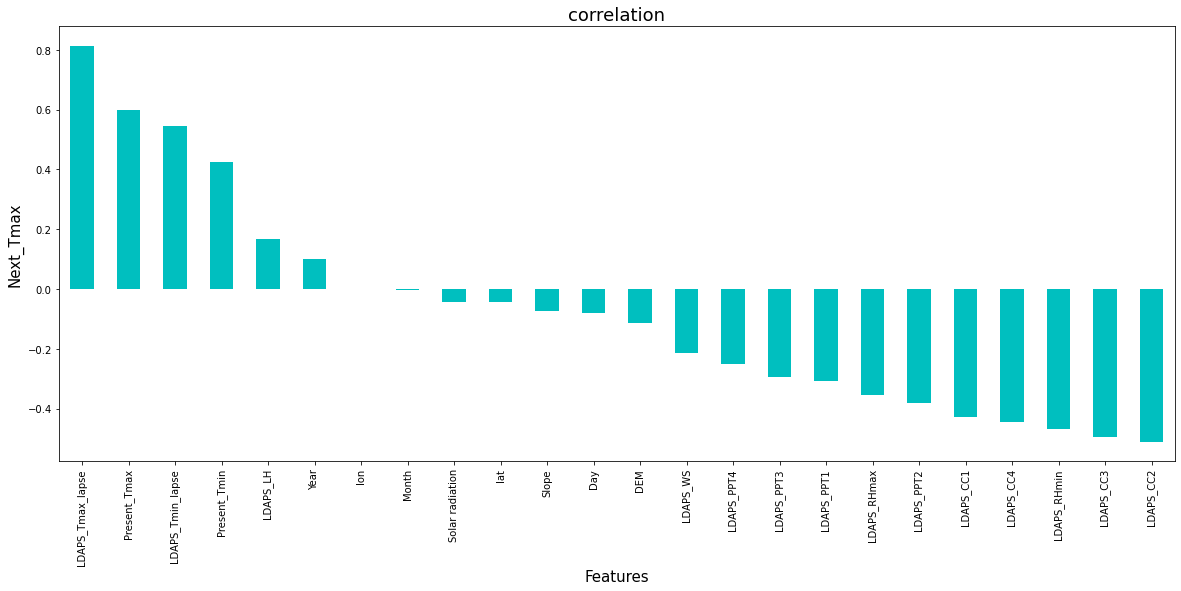

In [108]:
plt.figure(figsize = (20,8))
DF.corr()['Next_Tmax'].sort_values(ascending = False).drop(['Next_Tmin','Next_Tmax']).plot(kind='bar',color = 'c')
plt.xlabel('Features',fontsize=15)
plt.ylabel('Next_Tmax',fontsize=15)
plt.title('correlation',fontsize = 18)
plt.show()

LDAPS_Tmax_lapse,Present_Tmax,Present_Tmin,LDAPS_Tmin_lapse have the highest positive correlation with Next_Tmin while, LDAPS_CC2,LDAPS_CC3,LDAPS_CC1,LDAPS_RHmin,LDAPS_CC4,LDAPS_PPT2,LDAPS_RHmax,LDAPS_PPT3,LDAPS_PPT1 have the highest negative correlation with Next_Tmax

### Feature Selection

dropping columns station and Date, since they are not required.

In [109]:
DF.drop(columns = ['Date','station'],inplace=True)

KeyError: "['Date' 'station'] not found in axis"

In [110]:
from sklearn.preprocessing import StandardScaler

In [111]:
X = DF.drop(columns = ['Next_Tmax','Next_Tmin'])
y = DF[['Next_Tmax','Next_Tmin']]

In [112]:
scaler = StandardScaler()
scaled_X = scaler.fit_transform(X)

### Checking for Multicollinearity using Variance Inflation Factor

In [113]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [114]:
vif = pd.DataFrame()

In [115]:
vif["Features"] = X.columns
vif['vif'] = [variance_inflation_factor(scaled_X,i) for i in range(scaled_X.shape[1])]

In [116]:
vif

,Features,vif
0,Present_Tmax,2.842217
1,Present_Tmin,2.981951
2,LDAPS_RHmin,6.530511
3,LDAPS_RHmax,2.649804
4,LDAPS_Tmax_lapse,7.238328
5,LDAPS_Tmin_lapse,6.946012
6,LDAPS_WS,1.213889
7,LDAPS_LH,1.516162
8,LDAPS_CC1,4.054237
9,LDAPS_CC2,6.142428


LDAPS_RHmin,LDAPS_CC2,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse	age are highly multicollinear

### Principle Component Analysis

In [117]:
from sklearn.decomposition import PCA

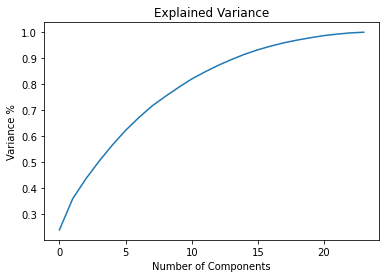

In [118]:
pca = PCA()
principleComponents = pca.fit_transform(scaled_X)
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance %')
plt.title('Explained Variance')
plt.show()

24 components explain around 95% variance in Data

### Selecting Kbest Features

In [119]:
from sklearn.feature_selection import SelectKBest, f_classif

In [121]:
bestfeat = SelectKBest(score_func = f_classif, k = 'all')
fit = bestfeat.fit(X,DF['Next_Tmax'])
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

In [123]:
fit = bestfeat.fit(X,DF['Next_Tmax'])
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
dfcolumns.head()
featureScores = pd.concat([dfcolumns,dfscores],axis = 1)
featureScores.columns = ['Feature', 'Score']
print(featureScores.nlargest(60,'Score'))

             Feature      Score
4   LDAPS_Tmax_lapse  84.482992
0       Present_Tmax  26.260825
5   LDAPS_Tmin_lapse  20.745154
9          LDAPS_CC2  16.903866
10         LDAPS_CC3  15.565359
2        LDAPS_RHmin  13.450023
11         LDAPS_CC4  13.175934
1       Present_Tmin  11.841963
8          LDAPS_CC1  11.068957
13        LDAPS_PPT2   9.737333
14        LDAPS_PPT3   8.232539
3        LDAPS_RHmax   7.199020
15        LDAPS_PPT4   6.570249
12        LDAPS_PPT1   6.417714
6           LDAPS_WS   3.325041
23              Year   2.535806
21               Day   2.213384
7           LDAPS_LH   2.084634
18               DEM   1.668340
22             Month   1.285917
19             Slope   1.188474
20   Solar radiation   0.955803
17               lon   0.890438
16               lat   0.877846


In [124]:
bestfeat = SelectKBest(score_func = f_classif, k = 'all')
fit = bestfeat.fit(X,DF['Next_Tmin'])
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

In [126]:
fit = bestfeat.fit(X,DF['Next_Tmin'])
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
dfcolumns.head()
featureScores = pd.concat([dfcolumns,dfscores],axis = 1)
featureScores.columns = ['Feature', 'Score']
print(featureScores.nlargest(60,'Score'))

             Feature       Score
5   LDAPS_Tmin_lapse  164.875142
1       Present_Tmin   80.710762
0       Present_Tmax   32.912454
4   LDAPS_Tmax_lapse   23.191019
18               DEM    4.237603
20   Solar radiation    3.549049
3        LDAPS_RHmax    2.998277
2        LDAPS_RHmin    2.776245
15        LDAPS_PPT4    2.504000
11         LDAPS_CC4    2.364243
10         LDAPS_CC3    2.286267
19             Slope    2.268207
22             Month    1.865896
8          LDAPS_CC1    1.796944
21               Day    1.793312
9          LDAPS_CC2    1.778839
23              Year    1.605587
14        LDAPS_PPT3    1.539921
13        LDAPS_PPT2    1.436636
16               lat    1.434806
12        LDAPS_PPT1    1.415764
6           LDAPS_WS    1.232675
7           LDAPS_LH    1.176892
17               lon    0.962684


#### Selecting best features based on their scores:

In [127]:
x_best = X.drop(columns=['LDAPS_Tmax_lapse','lon']).copy()

In [128]:
scaled_x_best = scaler.fit_transform(x_best)

### This is a Regression Problem since Target/ Label columns ('Next_Tmax','Next_Tmin') have Continuous type of Data.


## Regression Model Building

In [129]:
from sklearn.model_selection import train_test_split

In [130]:
from sklearn.metrics import r2_score

#### Finding the Best Random State

In [131]:
from sklearn.linear_model import Ridge
maxAcc = 0
maxRS=0
for i in range(1,100):
    x_train,x_test,y_train,y_test = train_test_split(scaled_x_best,y,test_size = .30, random_state = i)
    modRF =  Ridge()
    modRF.fit(x_train,y_train)
    pred = modRF.predict(x_test)
    acc  = r2_score(y_test,pred)
    if acc>maxAcc:
        maxAcc=acc
        maxRS=i
print(f"Best Accuracy is: {maxAcc} on random_state: {maxRS}")

Best Accuracy is: 0.7693328032466726 on random_state: 72


In [132]:
x_train,x_test,y_train,y_test = train_test_split(scaled_x_best,y,test_size = .30, random_state =72)

In [133]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge,Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from xgboost import XGBRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor


In [136]:
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.model_selection import ShuffleSplit,cross_val_score

In [135]:
RFR = RandomForestRegressor()
DTR = DecisionTreeRegressor()
KNN = KNeighborsRegressor()
L = Lasso()
R=Ridge()

### Training and testing the Models

In [137]:
models=[RFR,DTR,KNN,L,R]
for m in models:
    m.fit(x_train,y_train)
    pred=m.predict(x_test)
    r2=r2_score(y_test,pred)
    MSE=mean_squared_error(y_test,pred)
    RMSE=np.sqrt(mean_squared_error(y_test,pred))
    CVS=cross_val_score(m,scaled_x_best,y,cv=ShuffleSplit(5)).mean()
    print(m,"Results:")
    print("Accuracy:",r2)
    print("Cross Validation Score:",CVS)
    print("Mean Square Error:",MSE)
    print("Root Mean Sqaure Error:",RMSE)
    print("\n")

RandomForestRegressor() Results:
Accuracy: 0.8987283290821017
Cross Validation Score: 0.9018320918680862
Mean Square Error: 0.7170041227732304
Root Mean Sqaure Error: 0.8467609596416397


DecisionTreeRegressor() Results:
Accuracy: 0.7681160480454545
Cross Validation Score: 0.772529806960612
Mean Square Error: 1.659046701974003
Root Mean Sqaure Error: 1.2880398681616974


KNeighborsRegressor() Results:
Accuracy: 0.8852831444674506
Cross Validation Score: 0.893821008122228
Mean Square Error: 0.8109545498314885
Root Mean Sqaure Error: 0.9005301493184381


Lasso() Results:
Accuracy: 0.48055717070525433
Cross Validation Score: 0.48504481392175414
Mean Square Error: 3.9104773600810745
Root Mean Sqaure Error: 1.9774926953293845


Ridge() Results:
Accuracy: 0.7693328032466726
Cross Validation Score: 0.7630384086311925
Mean Square Error: 1.7401065966940383
Root Mean Sqaure Error: 1.3191310005810788




### Based on comparing Accuracy Score results with Cross Validation results, it is determined that Random Forest Regression is the best model. It also has the lowest Root Mean Squared Error score

###  Hyper Parameter Tuning

In [138]:
from sklearn.model_selection import GridSearchCV

#### Random Forest Regressor

In [139]:
parameter = {'n_estimators':[30,60],'max_depth': [10,20,40],'min_samples_leaf':[5,10,20],'min_samples_split':[5,10],'criterion':['mse','mae'],'max_features':["auto","sqrt","log2"]}

In [140]:
GridCV = GridSearchCV(RandomForestRegressor(),parameter,cv=3,n_jobs = -1,verbose = 1)

In [141]:
GridCV.fit(x_train,y_train)

Fitting 3 folds for each of 216 candidates, totalling 648 fits


GridSearchCV(cv=3, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'criterion': ['mse', 'mae'], 'max_depth': [10, 20, 40],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [5, 10, 20],
                         'min_samples_split': [5, 10],
                         'n_estimators': [30, 60]},
             verbose=1)

In [142]:
GridCV.best_params_

{'criterion': 'mse',
 'max_depth': 40,
 'max_features': 'auto',
 'min_samples_leaf': 5,
 'min_samples_split': 5,
 'n_estimators': 60}

In [143]:
Best_mod = RandomForestRegressor(n_estimators = 60,criterion = 'mse', max_depth= 40, max_features = 'auto',min_samples_leaf = 5, min_samples_split = 5)


In [144]:
Best_mod.fit(x_train,y_train)


RandomForestRegressor(max_depth=40, min_samples_leaf=5, min_samples_split=5,
                      n_estimators=60)

In [145]:
rfpred = Best_mod.predict(x_test)
acc = r2_score(y_test,rfpred)
print(acc*100)


88.13106566906308


##### Random Forest Regressor has an accuracy of 88.13%

#### Saving The Model

In [146]:
import joblib
joblib.dump(Best_mod,"BestModelTemp.pkl")

['BestModelTemp.pkl']

#### Loading The Model

In [147]:
mod=joblib.load("BestModelTemp.pkl")

In [148]:
print(mod.predict(x_test))

[[33.65185868 24.8919585 ]
 [31.56924734 23.00953499]
 [29.43995112 22.81345207]
 ...
 [32.7259298  27.09839817]
 [24.84630126 18.38253851]
 [34.62425392 25.77486348]]


In [149]:
y_test.rename(columns = {'Next_Tmin': 'Next_Tmin(Actual)','Next_Tmax': 'Next_Tmax(Actual)'},inplace=True)

In [150]:
y_test

,Next_Tmax(Actual),Next_Tmin(Actual)
5851,34.9,26.2
1706,31.0,22.8
1667,29.4,22.5
3844,33.1,20.7
474,30.1,23.8
...,...,...
1288,29.9,21.5
3387,32.1,22.9
6042,33.1,26.9
5523,24.6,19.9


In [151]:
predicted = pd.DataFrame({'Next_Tmax(Predicted)':mod.predict(x_test)[:,-2],'Next_Tmin(Predicted)':mod.predict(x_test)[:,-1]})

In [152]:
predicted

,Next_Tmax(Predicted),Next_Tmin(Predicted)
0,33.651859,24.891958
1,31.569247,23.009535
2,29.439951,22.813452
3,30.716721,22.310240
4,29.384844,23.770208
...,...,...
2072,31.069855,21.588794
2073,32.042040,23.572483
2074,32.725930,27.098398
2075,24.846301,18.382539


In [153]:
y_test.index=predicted.index

In [154]:
Prediction_accuracy = predicted.join(y_test)
Prediction_accuracy

,Next_Tmax(Predicted),Next_Tmin(Predicted),Next_Tmax(Actual),Next_Tmin(Actual)
0,33.651859,24.891958,34.9,26.2
1,31.569247,23.009535,31.0,22.8
2,29.439951,22.813452,29.4,22.5
3,30.716721,22.310240,33.1,20.7
4,29.384844,23.770208,30.1,23.8
...,...,...,...,...
2072,31.069855,21.588794,29.9,21.5
2073,32.042040,23.572483,32.1,22.9
2074,32.725930,27.098398,33.1,26.9
2075,24.846301,18.382539,24.6,19.9
